# Лабораторная работа №8. Выполнил Акинин Александр, студент 431 группы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.integrate import odeint

# Вспомогательные функции

In [2]:
def create_plot(title, x_label, y_label):
    fig, ax = plt.subplots(figsize=(8,5))
    fig.tight_layout()
    
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    
    return fig, ax

In [3]:
def create_double_plot(title_1, x_label_1, y_label_1, title_2, x_label_2, y_label_2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#     fig.tight_layout()
    
    ax1.grid()
    ax1.set_title(title_1)
    ax1.set_xlabel(x_label_1)
    ax1.set_ylabel(y_label_1)
    ax1.axhline(0, color='black')
    ax1.axvline(0, color='black')
    
    ax2.grid()
    ax2.set_title(title_2)
    ax2.set_xlabel(x_label_2)
    ax2.set_ylabel(y_label_2)
    ax2.axhline(0, color='black')
    ax2.axvline(0, color='black')
    
    return fig, (ax1, ax2)

# Дифференциальное уравнение второго порядка, сведеное к системе дифференциальных уравнений первого порядка

In [4]:
def diff_system(Z, x):
    """ Изначальное дифференциальное уравнение второго порядка: y'' + 16y' - 16y = sin(4x)*e^x
    Можно записать его как систему из двух дифференциальных уравнений первого порядка
    {y' = z ; z' = sin(4x)*e^x + 16y - 16z} """
    y, z = Z
    tmp = np.zeros(2)
    tmp[0] = z
    tmp[1] = np.sin(4*x)*np.e**x + 16*y - 16*z
    return tmp

In [5]:
# Начальные условия
Z_0 = np.array([1,0])

# Отрезок интегрирования
x_start, x_end, n_x = 0, 2, 1000
x_span = np.linspace(x_start, x_end, n_x)

# Аналитическое решение дифференцильного уравнения 

Аналитическое решение для дифференциального уравнения 

$$ y'' + 16y' - 16y = \sin(4x)e^x $$

будет иметь вид

$$ y(x) = C_1 e^{(-8-4\sqrt{5})x} + C_2 e^{(4\sqrt{5}-8)x} - \frac{5}{1803} e^x \sin(4x) - \frac{8}{601}e^x \cos(4 x) $$

где $C_1,\ C_2$ - постоянные, зависящие от начальных условий $y(0),\ y'(0)$

В данной работе начальные условия заданы так

\begin{equation}
\begin{cases}
y(0) = 1 \\
y'(0) = 0
\end{cases}
\end{equation}

\begin{equation}
\begin{cases}
y(0) = C_1+C_2 = \frac{609}{601} \\
y'(0) = C_1(-8-4\sqrt{5}) + C_2(4\sqrt{5}-8) = \frac{44}{1803}
\end{cases}
\end{equation}

\begin{equation}
\begin{cases}
C_1 = \frac{2577}{49439} \approx 5.21248\cdot 10^{-2}\\
C_2 = \frac{55744}{57995} \approx 9.61186\cdot 10^{-1}
\end{cases}
\end{equation}


In [6]:
C_1, C_2 = 2577/49439, 55744/57995
y_analitic = C_1*np.e**((-8-4*np.sqrt(5))*x_span) + C_2*np.e**((4*np.sqrt(5)-8)*x_span) - \
                            5/1803*np.e**x_span*np.sin(4*x_span) - 8/601*np.e**x_span*np.cos(4*x_span)

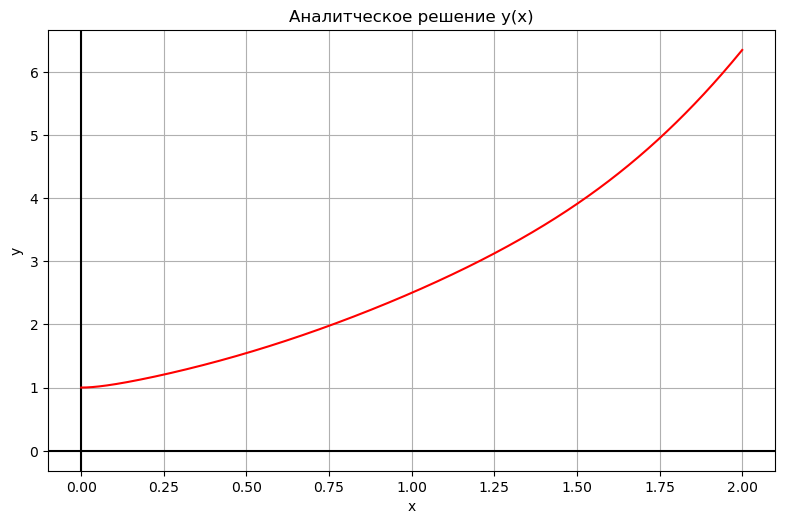

In [7]:
fig, ax = create_plot('Аналитческое решение y(x)', 'x', 'y')
ax.plot(x_span, y_analitic, color='red')

# Метод Эйлера 

Задача Коши задается в виде

\begin{equation}
\begin{cases}
\frac{dy}{dx} = f(x,y) \\
y(x_0) = y_0
\end{cases}
\end{equation}

Введем сетку $\{x_i\}$ из $n+1$ точек: $x_0 < x_1 < ... < x_n$

Приближенное решение на сетке $\{x_i\}$ определяется по формуле

$$ y_i = (x_i-x_{i-1})\cdot f(x_{i-1}, y_{i-1}),\ i=1,2,...,n $$

In [8]:
def Euler_method(system, Z_0, x_span):
    h = x_span[1] - x_span[0]
    
    solution = np.zeros((len(x_span), len(Z_0)))
    solution[0,:] = Z_0
        
    for i in range(len(x_span)):
        if i == 0: continue
        solution[i,:] = solution[i-1,:] + h*system(solution[i-1,:], x_span[i-1])
    
    return solution

In [9]:
Z_Euler = Euler_method(diff_system, Z_0, x_span)
y_Euler, dy_dx_Euler = Z_Euler[:,0], Z_Euler[:,1]

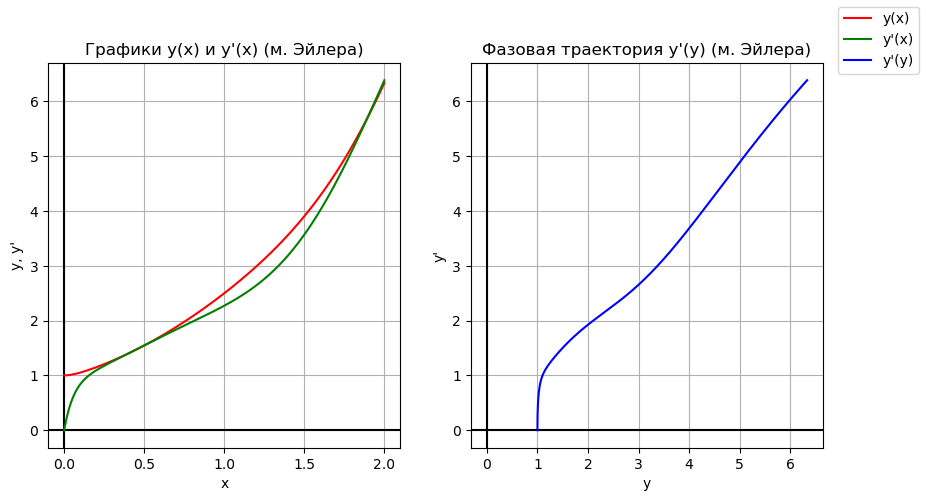

In [10]:
fig, (ax1, ax2) = create_double_plot("Графики y(x) и y'(x) (м. Эйлера)", 'x', "y, y'", \
                                     "Фазовая траектория y'(y) (м. Эйлера)", 'y', "y'")
ax1.plot(x_span, y_Euler, label='y(x)', color='red')
ax1.plot(x_span, dy_dx_Euler, label="y'(x)", color='green')
ax2.plot(y_Euler, dy_dx_Euler, label="y'(y)", color='blue')
fig.legend()

# Метод Адамса при $k=1$

Способом повысить точность метода является использование не одного, а нескольких вычисленных ранее значений функции. Примером такого алгоритма служит метод Адамса — Башфорта.

Метод Адамса — Башфорта аналогичен методу Эйлера, но формуля выглядит вледующим образом

$$ y_{n+2} = y_{n+1} + \frac{3}{2} hf(y_{n+1}, x_{n+1}) - \frac{1}{2}hf(y_n, x_n) $$

In [11]:
def Adams_Bashforth_fst_method(system, Z_0, x_span):
    h = x_span[1] - x_span[0]
    
    solution = np.zeros((len(x_span), len(Z_0)))
    solution[0,:] = Z_0
    solution[1,:] = Z_0 + h*system(Z_0, x_span[0])
        
    for i in range(len(x_span)):
        if (i == 0) or (i == 1): continue
        solution[i,:] = solution[i-1,:] + 3/2 * h*system(solution[i-1,:], x_span[i-1]) \
                                        - 1/2 * h*system(solution[i-2,:], x_span[i-2])
    return solution

In [12]:
Z_Adams = Adams_Bashforth_fst_method(diff_system, Z_0, x_span)
y_Adams, dy_dx_Adams = Z_Adams[:,0], Z_Adams[:,1]

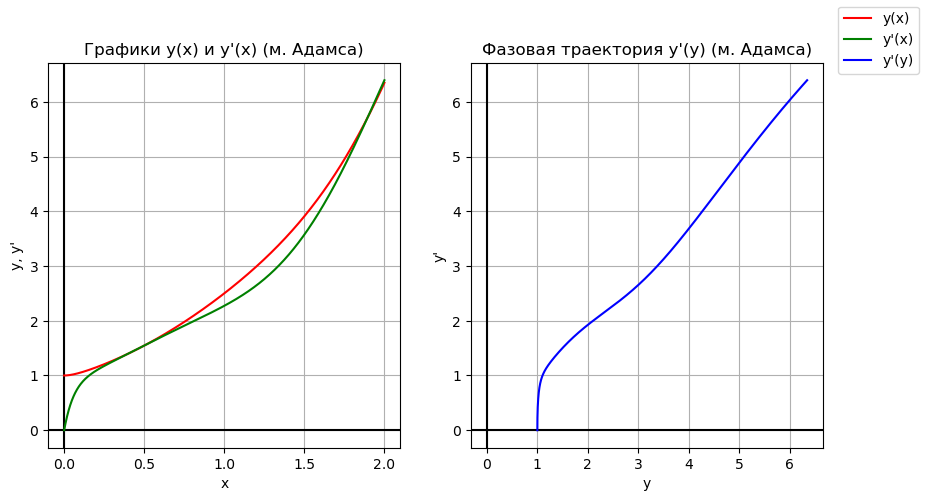

In [13]:
fig, (ax1, ax2) = create_double_plot("Графики y(x) и y'(x) (м. Адамса)", 'x', "y, y'", \
                                     "Фазовая траектория y'(y) (м. Адамса)", 'y', "y'")
ax1.plot(x_span, y_Adams, label='y(x)', color='red')
ax1.plot(x_span, dy_dx_Adams, label="y'(x)", color='green')
ax2.plot(y_Adams, dy_dx_Adams, label="y'(y)", color='blue')
fig.legend()

# Метод Рунге-Кутты

Аналогично методу Эйлера задается метод Рунге-Кутты, но формула для него будет иметь вид

$$ y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$

\begin{equation}
\begin{cases}
k_1 = f(x_n, y_n) \\
k_2 = f\left(x_n+\frac{h}{2}, y_n+\frac{h}{2}k_1\right) \\
k_3 = f\left(x_n+\frac{h}{2}, y_n+\frac{h}{2}k_2\right) \\
k_4 = f(x_n+h,y_n+hk_3)
\end{cases}
\end{equation}

In [14]:
def Runge_Kutta_method(func, Z_0, x_span):
    h = x_span[1] - x_span[0]
    
    solution = np.zeros((len(x_span), len(Z_0)))
    solution[0,:] = Z_0
    
    for i in range(len(x_span)):
        if (i == 0): continue
        k_1 = func(solution[i-1,:], x_span[i-1])
        k_2 = func(solution[i-1,:]+h/2*k_1, x_span[i-1]+h/2)
        k_3 = func(solution[i-1,:]+h/2*k_2, x_span[i-1]+h/2)
        k_4 = func(solution[i-1,:]+h  *k_3, x_span[i-1]+h  )
        solution[i,:] = solution[i-1,:] + h/6* (k_1 + 2*k_2 + 2*k_3 + k_4)
    return solution

In [15]:
Z_RK = Runge_Kutta_method(diff_system, Z_0, x_span)
y_RK, dy_dx_RK = Z_RK[:,0], Z_RK[:,1]

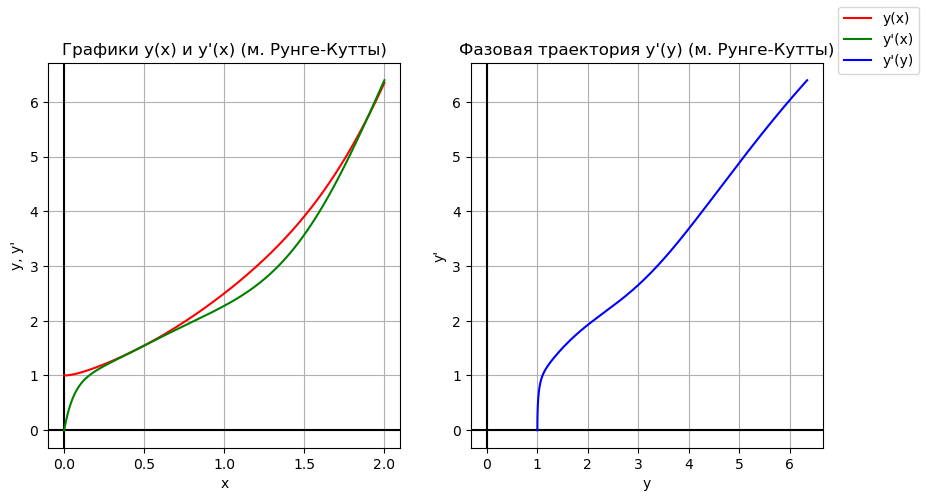

In [16]:
fig, (ax1, ax2) = create_double_plot("Графики y(x) и y'(x) (м. Рунге-Кутты)", 'x', "y, y'", \
                                     "Фазовая траектория y'(y) (м. Рунге-Кутты)", 'y', "y'")
ax1.plot(x_span, y_RK, label='y(x)', color='red')
ax1.plot(x_span, dy_dx_RK, label="y'(x)", color='green')
ax2.plot(y_RK, dy_dx_RK, label="y'(y)", color='blue')
fig.legend()

# Решение с помощью библиотеки scipy

In [17]:
Z_scipy = odeint(diff_system, Z_0, x_span)
y_scipy, dy_dx_scipy = Z_scipy[:,0], Z_scipy[:,1]

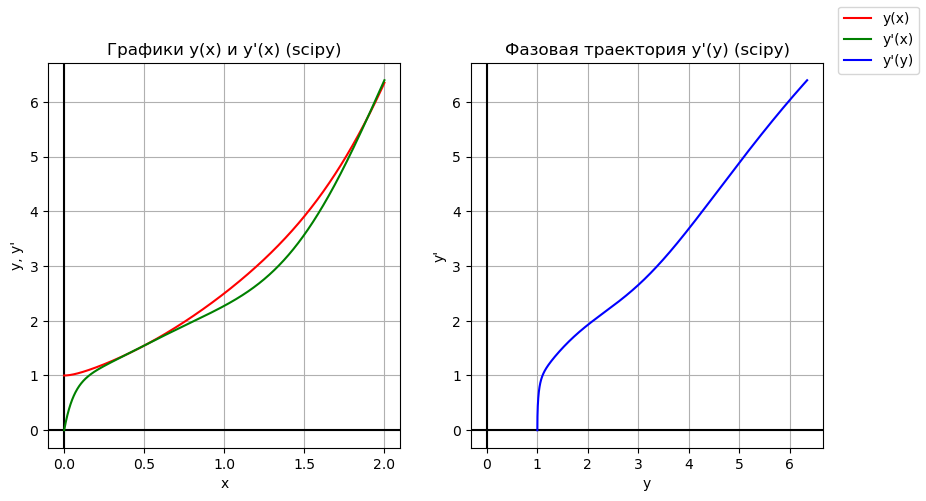

In [18]:
fig, (ax1, ax2) = create_double_plot("Графики y(x) и y'(x) (scipy)", 'x', "y, y'", \
                                     "Фазовая траектория y'(y) (scipy)", 'y', "y'")
ax1.plot(x_span, y_scipy, label='y(x)', color='red')
ax1.plot(x_span, dy_dx_scipy, label="y'(x)", color='green')
ax2.plot(y_scipy, dy_dx_scipy, label="y'(y)", color='blue')
fig.legend()

# Невязка численных решений с аналитическим решением

/tmp/ipykernel_3532/3476043130.py:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


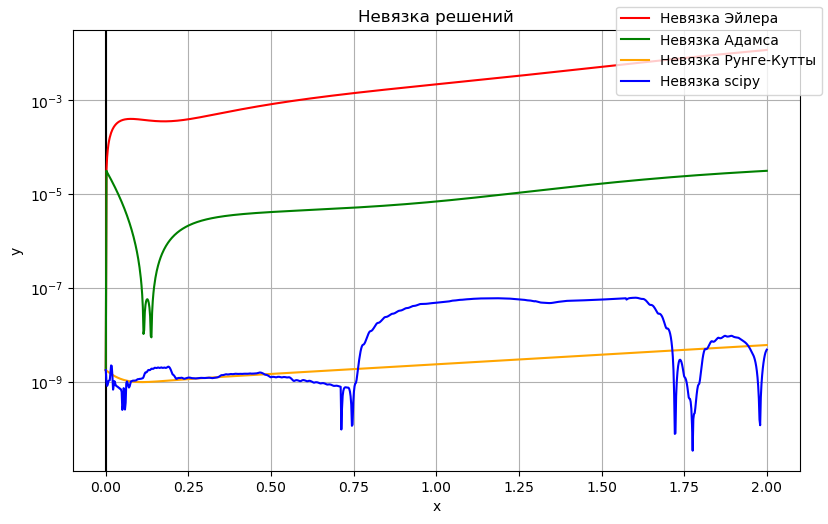

In [19]:
fig, ax = create_plot('Невязка решений', 'x', 'y')
ax.set_yscale('log')
ax.plot(x_span, abs(y_analitic-y_Euler), label='Невязка Эйлера', color='red')
ax.plot(x_span, abs(y_analitic-y_Adams), label='Невязка Адамса', color='green')
ax.plot(x_span, abs(y_analitic-y_RK), label='Невязка Рунге-Кутты', color='orange')
ax.plot(x_span, abs(y_analitic-y_scipy), label='Невязка scipy', color='blue')
fig.legend()